# LES RESEAUX A CONVOLUTION


## C'est quoi un réseau a convolution ?


### Un réseau a convolution est un réseau très utilisé dans l'analyse et la classification d'image. Car il permet d'extraire des caractéristiques ce qu'est incapable de faire un réseau de neuronne classique.

### Pour ce faire il va prendre une image en entrée, appliquer une série de filtre, une phase de pooling.
### Refaire l'opération en fonction du nombre de couche de convolution
### Aplatir
### Envoyer le tout sur un réseau dense


<img src="images/cnn_1.png">

## Etape 1 l'image

Bon déjà on va essayer de se souvenir de comment une machine "voit" une image

<img src="images/cnn_cat.png">

En gros ca voit un tableau avec pleins de chiffres ...

## Etape 2 : les filtres

### les filtres vont parcourir nos images pour appliquer en appliquant un fonction transformant l'image et générant une feature map

<img src="images/cnn_f1.png">


## Exemple de filtre
<img src="images/cnn_f3.png">


<img src="images/filters.gif">

<img src="images/feature_map.png">

# Le pooling


Le pooling est une phase très importante dans notre réseau a convolution. Il permet de réduire la taille des images en ne gardant que les caractéristiques essentielles. Il existe plusieurs types de pooling, mais le plus utilisé reste le Max Pooling dont le principe s'illustre comme ceci

<img src="images/max_pool.png">

# L'applatissement


Comme en sortie de convolution l'on passe par un réseau de neuronne dense, il est impératif d'applatir nos images pour passer d'une matrice à un vecteur

<img src="images/cnn_flat.png">

# CONSTRUCTION


# Importer les librairies

In [1]:
import numpy as np
import tensorflow as tf
#Va nous permettre d'accèder a certains dataset
# ( https://keras.io/datasets/ )
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt


# Importer le dataset

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

![title](https://miro.medium.com/max/1000/1*k4SvUd6Lqnf2MgkB9TvSaw.png)

In [3]:
class_names = ['top','trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','	Ankle boot']
print(class_names)


['top', 'trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', '\tAnkle boot']


# Preprocessing

Normalisation
#On va préparer un peu les données. Tout d'abord, nos données contiennent des tableaux contennant des valeurs allant de 0 à 255 ( niveau de gris ). Il est assez facile de normaliser les données en divisant chaque valeur par 255 afin de n'obtenir que des valeurs allant de 0 à 1

In [4]:

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255


Reshape
#Le seconde consiste à transformer nos images qui sont des tableaux a deux dimensions en un vecteur unique. Nous allons donc passer d"un tableau de 28 lignes, 28 colonnes à un vecteur de 784 valeurs ( 28*28).

In [5]:
X_train =  X_train.reshape(60000, 28, 28, 1)

In [6]:
X_train.shape

(60000, 28, 28, 1)

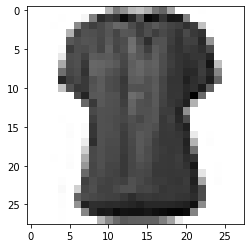

In [7]:
plt.imshow(X_train[55].reshape((28, 28)), cmap=plt.cm.binary)

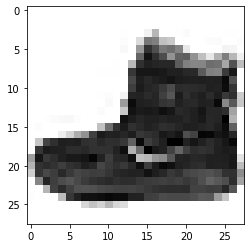

In [8]:
plt.imshow(X_train[0].reshape((28, 28)), cmap=plt.cm.binary)

In [9]:
label_test = X_test
X_test =  X_test.reshape(10000, 28, 28, 1)
X_test.shape

(10000, 28, 28, 1)

# Construction de notre CNN


Nous partons ici sur un modèle simple qui est un modèle séquentiel. https://keras.io/layers/core/

In [10]:
model = tf.keras.models.Sequential()

#On créé notre première couche cachée Qui est une couche dense constituée de 128 Neuronnes ( units ) 
#avec une activation Relu (Unité de Rectification Linéaire). 
#et en fait comme il s'agit de la première couche que nous créons nous
#lui indiquons le forme de nos data :-) https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

In [11]:
# Must define the input shape in the first layer of the neural network

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=3))


model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=3))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 16)          4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 144)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               37120     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [14]:
history = model.fit(X_train, y_train, epochs=5,validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.5870 - sparse_categorical_accuracy: 0.7869 - val_loss: 0.4126 - val_sparse_categorical_accuracy: 0.8452
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3791 - sparse_categorical_accuracy: 0.8603 - val_loss: 0.3301 - val_sparse_categorical_accuracy: 0.8761
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3383 - sparse_categorical_accuracy: 0.8742 - val_loss: 0.3211 - val_sparse_categorical_accuracy: 0.8824
Epoch 4/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3124 - sparse_categorical_accuracy: 0.8861 - val_loss: 0.2968 - val_sparse_categorical_accuracy: 0.8909
Epoch 5/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2951 - sparse_categorical_accuracy: 0.8921 - val_loss: 0.2877 - val_sparse_categorical_accuracy: 0.8942


In [15]:
# Evaluate the model on test set
score = model.evaluate(X_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8942000269889832


# VISUALISATION DE LA COURBE D'APPRENTISSAGE

NameError: name 'plot' is not defined

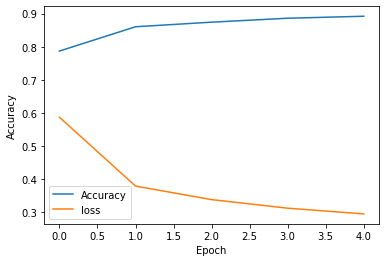

In [17]:
plt.plot(history.history['sparse_categorical_accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plot
#test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

# Visualiser

## Création d'un tableau contenant nos prédictions

In [18]:
prediction = model.predict(X_test)


## Création des fonctions de visualisation

In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [21]:
(images_train, labels_train), (images_test, labels_test) = fashion_mnist.load_data()

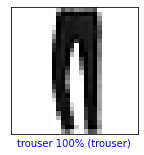

In [27]:
i = 2
plt.figure(figsize=(5,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], labels_test, images_test)
plt.show()